#  CIFAR-10 PCA, NMF
# Part 1
## 1. Load packages and get the CIFAR-10 data

In [154]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import minmax_scale
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## 2. Get all the images of cars

In [155]:
# labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'ho rse', 'ship', 'truck']
img_index = np.where(y_train == 1)[0]

In [156]:
X_train.shape

(50000, 32, 32, 3)

In [157]:
y_train.shape

(50000, 1)

In [158]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

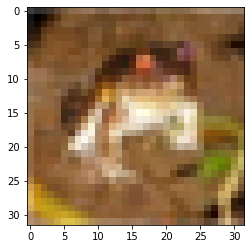

In [159]:
plt.imshow(X_train[0, :, :, :]) #first image

In [96]:
X = X.reshape(50000, -1)

ValueError: cannot reshape array of size 15360000 into shape (50000,newaxis)

In [160]:
 X = X_train[img_index[:1000]]

In [161]:
#y_train #lables

In [162]:
# labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
img_index = np.where(y_train == 1)[0] #look at only cars

In [163]:
#X = X_train[img_index[:1000]] #look at first 1000 cars

## 3. Plot an example image

In [164]:
X = X_train

In [165]:
X = X_train[img_index]

In [166]:
X.shape

(5000, 32, 32, 3)

In [167]:
X = X.reshape(5000, -1) #flatten the features to one row

In [168]:
X.shape #30720=32*32*3*10

(5000, 3072)

In [169]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80
1,159,102,101,150,91,95,153,95,97,154,...,14,166,47,14,173,51,17,182,57,19
2,50,64,37,51,63,41,42,55,41,62,...,165,176,169,166,176,168,166,173,165,162
3,139,154,188,144,160,192,146,162,192,148,...,66,129,117,80,128,114,75,112,105,59
4,54,31,18,59,34,19,56,37,22,49,...,102,98,121,111,96,117,106,92,112,101


In [170]:
pd.DataFrame(y_test)

,0
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


In [171]:
df = pd.concat([pd.DataFrame(y_test), pd.DataFrame(X)], axis=1)

In [172]:
df.shape

(10000, 3073)

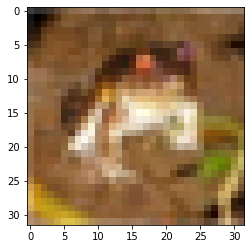

In [173]:
plt.imshow(X_train[0])

## 4. Compute PCA with 50 components

In [174]:
X.shape

(5000, 3072)

In [111]:
X = X.reshape(1000, -1) #flatten the features to one row

In [175]:
X.shape

(5000, 3072)

In [176]:
X.mean()

116.69753678385416

In [177]:
pca = PCA(n_components=50).fit(X)

In [178]:
pca.explained_variance_ratio_  #the 1st components explain 26.6%

array([0.2760726 , 0.09282116, 0.06546131, 0.03347906, 0.02979704,
       0.02542498, 0.02469512, 0.02382297, 0.02119475, 0.01922009,
       0.01676873, 0.01354951, 0.01142178, 0.01130035, 0.00957495,
       0.00950613, 0.00820103, 0.00764276, 0.0067706 , 0.0065233 ,
       0.0061182 , 0.00602657, 0.00542153, 0.00523339, 0.0049801 ,
       0.00494041, 0.00462843, 0.00434821, 0.004228  , 0.00407088,
       0.00388903, 0.00379077, 0.00358972, 0.00352214, 0.0032384 ,
       0.00320681, 0.00302163, 0.00299167, 0.00290405, 0.00272165,
       0.00264449, 0.00260619, 0.00258491, 0.0024623 , 0.00239997,
       0.00236075, 0.0022746 , 0.00217857, 0.00214224, 0.00212504])

In [179]:
pca.components_.shape # it is acturally the loadings

(50, 3072)

## 5. Plot the scree plot and cumulative explained variance plot.
 How much of the variance do the top 50 components explain? 

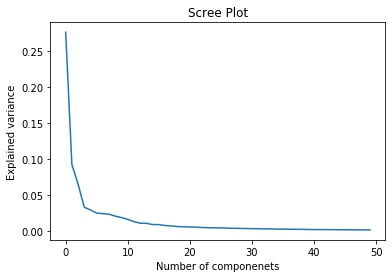

In [181]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel('Number of componenets')
plt.ylabel('Explained variance')
plt.show()

Top 50 components explain 82% of the variance.


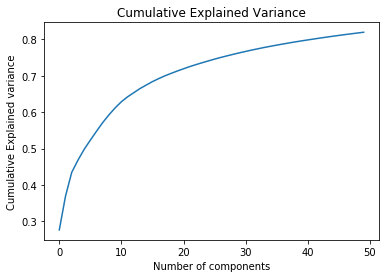

In [182]:
print('Top 50 components explain {:.0f}% of the variance.'
      .format(100*pca.explained_variance_ratio_.sum()))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance")
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.show()

## 6. Plot a few of the top prinicipal component loadings
Note: to plot an RGB image with `plt.imshow()`, we need to give it an array of floats between 0 and 1, or integers between 0 and 255. 

Since the PC loadings can be negative, we'll scale the values of each image to fall within range 0 to 1.

In [183]:
pca.components_[2][:100] #scale fo loadings could be negative

array([-0.01031534, -0.01111248, -0.01142176, -0.01048426, -0.0112605 ,
       -0.01165161, -0.01092738, -0.01143927, -0.01182758, -0.01146869,
       -0.01204477, -0.01229891, -0.01195073, -0.01263674, -0.01285877,
       -0.0115868 , -0.01235087, -0.01269411, -0.01198371, -0.01269279,
       -0.01300077, -0.01232348, -0.01285745, -0.01315349, -0.01293434,
       -0.01336287, -0.01351144, -0.01352947, -0.01406746, -0.01414476,
       -0.01343585, -0.01399905, -0.01412073, -0.01310647, -0.01365151,
       -0.01380667, -0.01313055, -0.01368358, -0.01411522, -0.01357317,
       -0.01401375, -0.01456117, -0.01343982, -0.01395366, -0.01455629,
       -0.01338572, -0.01391855, -0.01453623, -0.01362731, -0.01422305,
       -0.01480005, -0.01337408, -0.01398365, -0.01450492, -0.01309049,
       -0.01375062, -0.01426079, -0.01283933, -0.01355073, -0.01411784,
       -0.01269189, -0.01345588, -0.01409271, -0.01259702, -0.01325742,
       -0.01388855, -0.01266612, -0.01331188, -0.01396088, -0.01

In [184]:
loadings = minmax_scale(pca.components_, feature_range=(0,1), axis=1)
loadings[5]

array([0.40816833, 0.32406765, 0.25730312, ..., 0.31572547, 0.2456008 ,
       0.16078121])

In [185]:
pca.components_[1]

array([-0.01112152, -0.01118038, -0.01310224, ...,  0.0303467 ,
        0.02939947,  0.02842061])

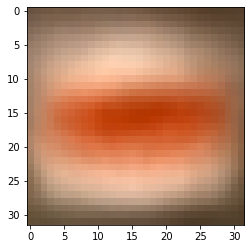

In [186]:
plt.imshow(loadings[5].reshape(32, 32, 3))

## 7. Plot an image and plot it’s reconstruction using PCA. (Choose a different image)

In [187]:
PCs = pca.transform(X)

In [188]:
PCs.shape

(5000, 50)

In [189]:
X_recon = pca.inverse_transform(PCs).astype('int')

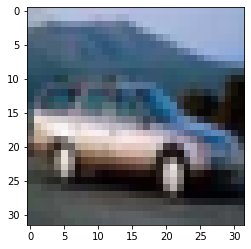

In [190]:
plt.imshow(X[0].reshape(32, 32, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


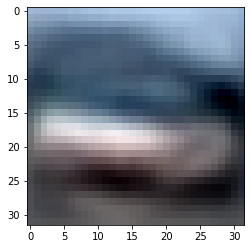

In [192]:
plt.imshow(X_recon[0].reshape(32, 32, 3))

#Part2

In [193]:
pca = PCA(n_components=200).fit(X)

Top 200 components explain 94% of the variance.


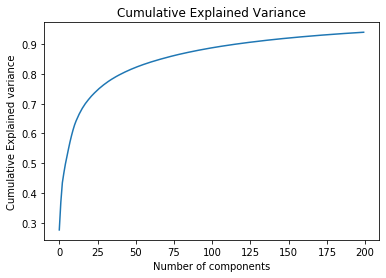

In [194]:
print('Top 200 components explain {:.0f}% of the variance.'
      .format(100*pca.explained_variance_ratio_.sum()))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance")
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.show()

In [195]:
PCs = pca.transform(X)

In [196]:
X_recon = pca.inverse_transform(PCs).astype('int')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


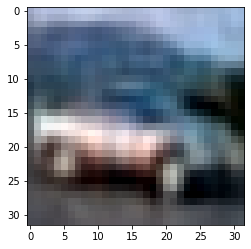

In [197]:
plt.imshow(X_recon[0].reshape(32, 32, 3))

In [198]:
pca = PCA(n_components=500).fit(X)

Top 200 components explain 98% of the variance.


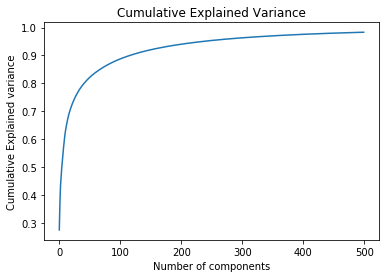

In [199]:
print('Top 200 components explain {:.0f}% of the variance.'
      .format(100*pca.explained_variance_ratio_.sum()))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance")
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


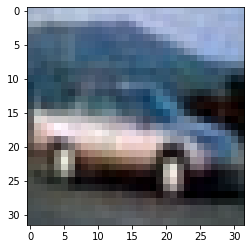

In [200]:
PCs = pca.transform(X)
X_recon = pca.inverse_transform(PCs).astype('int')
plt.imshow(X_recon[0].reshape(32, 32, 3))

In [ ]:
nmf = NMF(n_components=50).fit(X)

In [ ]:
loadings = minmax_scale(nmf.components_, feature_range=(0,1), axis=1)

In [ ]:
plt.imshow(nmf.components_[0].reshape(32, 32, 3))

In [ ]:
plt.imshow(loadings[5].reshape(32, 32, 3))

In [ ]:
plt.imshow(loadings[0].reshape(32, 32, 3))